# loading data sets

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gs=pd.read_csv("/content/titanic/gender_submission.csv")
gs.head()
te=pd.read_csv("/content/titanic/test.csv")
te.head()
tr=pd.read_csv("/content/titanic/train.csv")
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# filtering data

In [48]:
tr['Age'].fillna(tr['Age'].median(), inplace=True)
tr['Embarked'].fillna(tr['Embarked'].mode()[0], inplace=True)
tr['Sex'] = tr['Sex'].map({'male': 0, 'female': 1})
tr['Embarked'] = tr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

<ipython-input-48-f75ca2cd683f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tr['Age'].fillna(tr['Age'].median(), inplace=True)
<ipython-input-48-f75ca2cd683f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# making features

In [49]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
sc=features+['Survived']
tr=tr[sc]
X=tr[features]
Y=tr["Survived"]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


## traning model

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("traning data sets",X_train.shape)
print("testing data sets",X_test.shape)

traning data sets (712, 7)
testing data sets (179, 7)


# decision tree

In [51]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy"]
}

grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Accuracy: 0.7988826815642458
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.8173840244262781


visualization

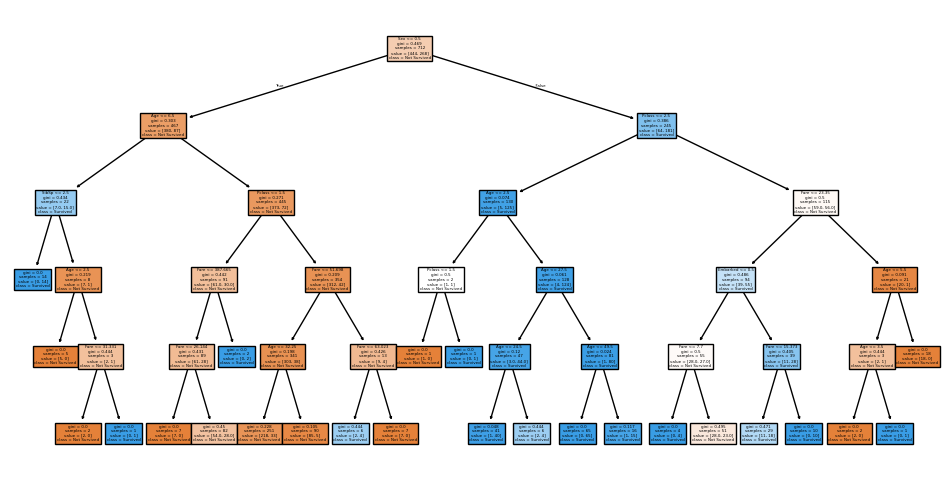

In [54]:
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=features, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

important features

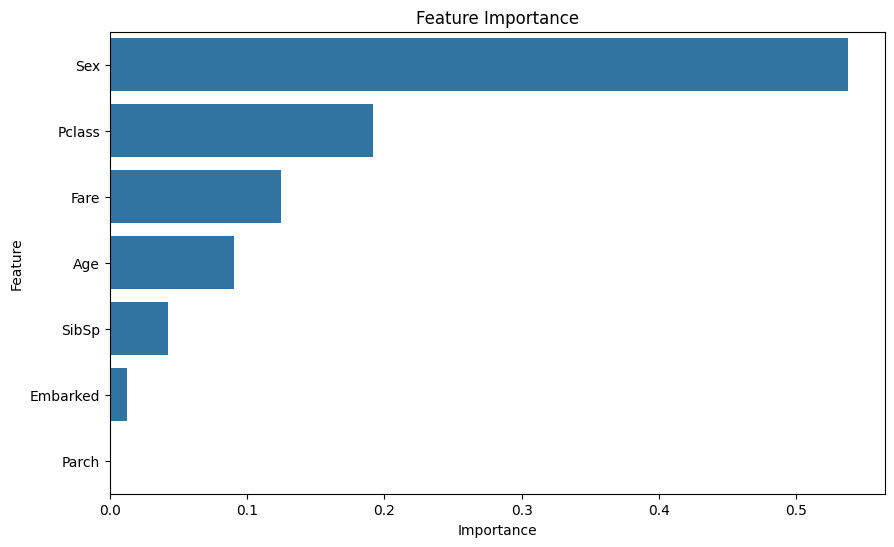

In [55]:
features_importance = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': features_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


## saving model

In [57]:
# Save the trained model
joblib.dump(dt_model, "/content/titanic_decision_tree.pkl")
print("Model saved successfully!")


Model saved successfully!


In [60]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save model to Drive
joblib.dump(dt_model, "/content/drive/My Drive/titanic_decision_tree.pkl")
print("Model saved to Google Drive!")


Mounted at /content/drive
Model saved to Google Drive!


# user ***input***

In [62]:

dt_model = joblib.load("titanic_decision_tree.pkl")
print("Model loaded successfully!")
# Take user input for prediction
pclass = int(input("Enter Passenger Class (1 = First, 2 = Second, 3 = Third): "))
sex = input("Enter Gender (Male/Female): ")
age = float(input("Enter Age: "))
fare = float(input("Enter Fare Amount: "))
embarked = input("Enter Embarked Port (S = Southampton, C = Cherbourg, Q = Queenstown): ")
sibsp = int(input("Enter Number of Siblings/Spouses Aboard: "))
parch = int(input("Enter Number of Parents/Children Aboard: "))

# Convert categorical inputs
sex = 0 if sex.lower() == "male" else 1
embarked = {"s": 0, "c": 1, "q": 2}.get(embarked.lower(), 0)  # Default to 'S' if invalid input

# Create input array
user_input = np.array([[pclass, sex, age, fare, embarked, sibsp, parch]])

# Predict survival
prediction = dt_model.predict(user_input)
result = "Survived" if prediction[0] == 1 else "Not Survived"

print("\n🎯 Prediction Result:", result)



Model loaded successfully!
Enter Passenger Class (1 = First, 2 = Second, 3 = Third): 1
Enter Gender (Male/Female): m
Enter Age: 80
Enter Fare Amount: 5400
Enter Embarked Port (S = Southampton, C = Cherbourg, Q = Queenstown): southampton
Enter Number of Siblings/Spouses Aboard: 1
Enter Number of Parents/Children Aboard: 2

🎯 Prediction Result: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
